In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("mushroom.csv")

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


## Task 1: Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [7]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [8]:
df.duplicated().sum()

1024

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [13]:
df['class'].value_counts()

class
poisonous    618
edible       358
Name: count, dtype: int64

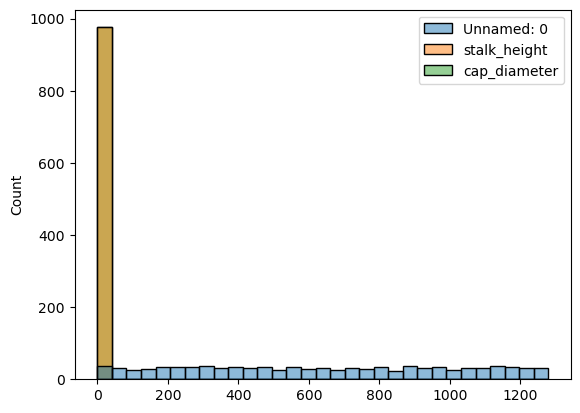

In [21]:
sns.histplot(data=df)  # Example for visualizing class distribution
plt.show()

<Axes: ylabel='Density'>

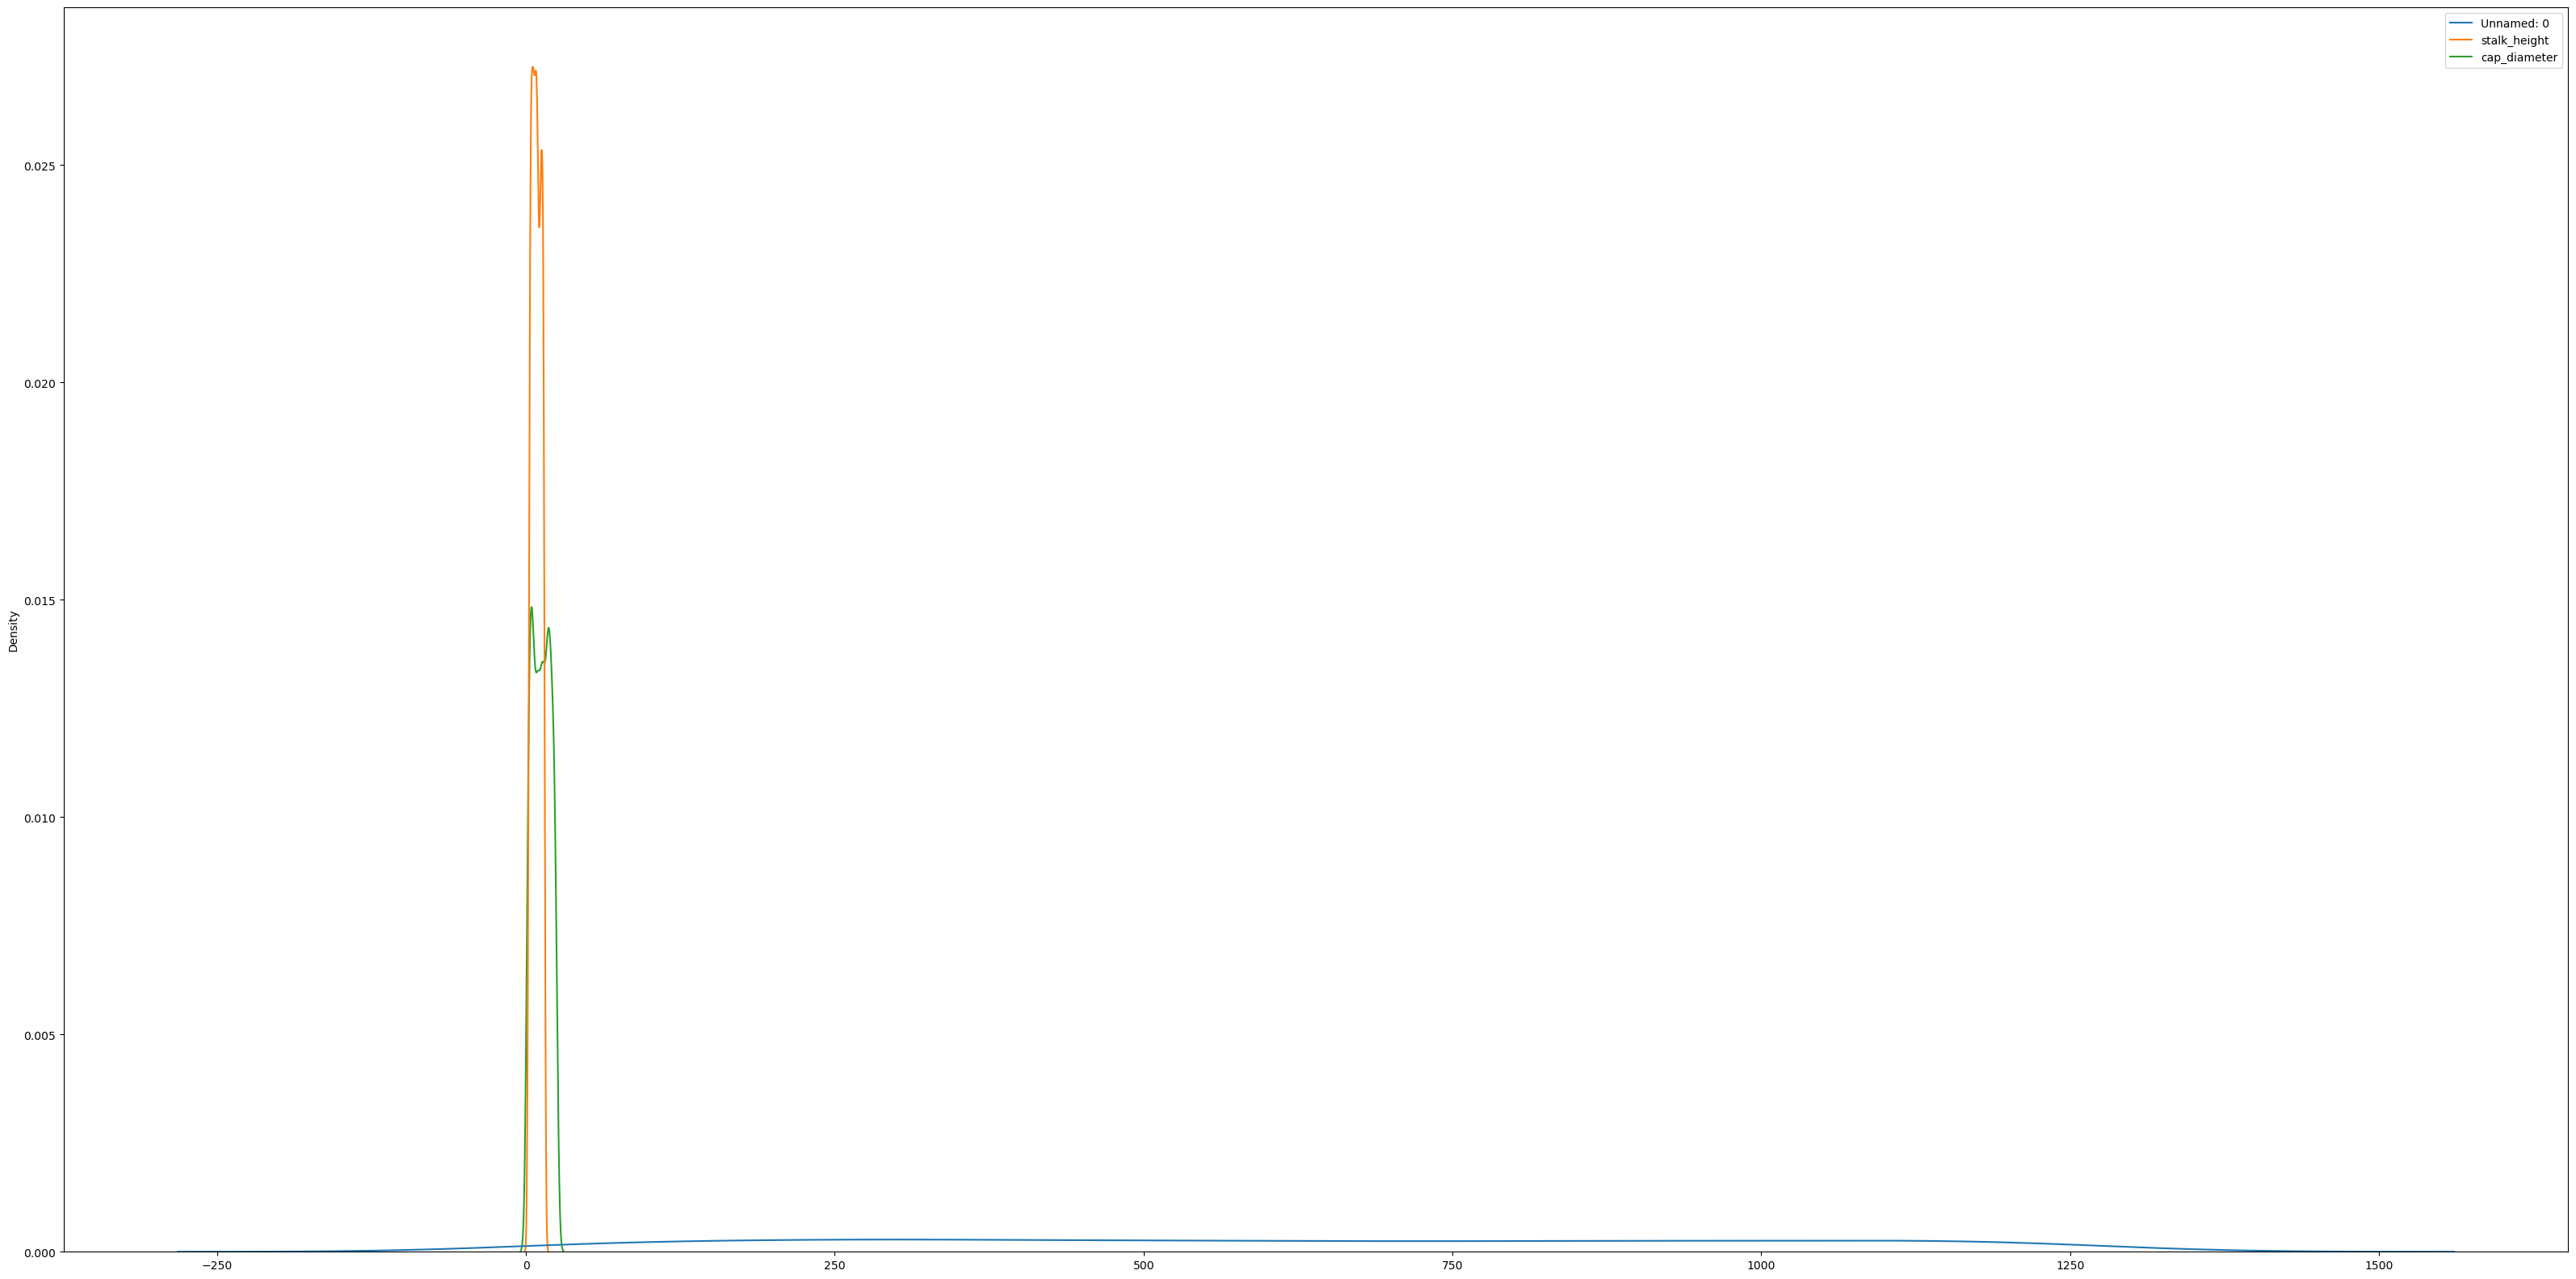

In [22]:
plt.figure(figsize=(40,20))
sns.kdeplot(data=df)

<Axes: >

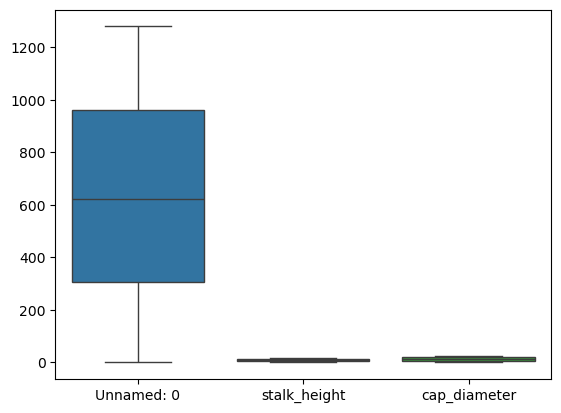

In [24]:
sns.boxplot(data=df)

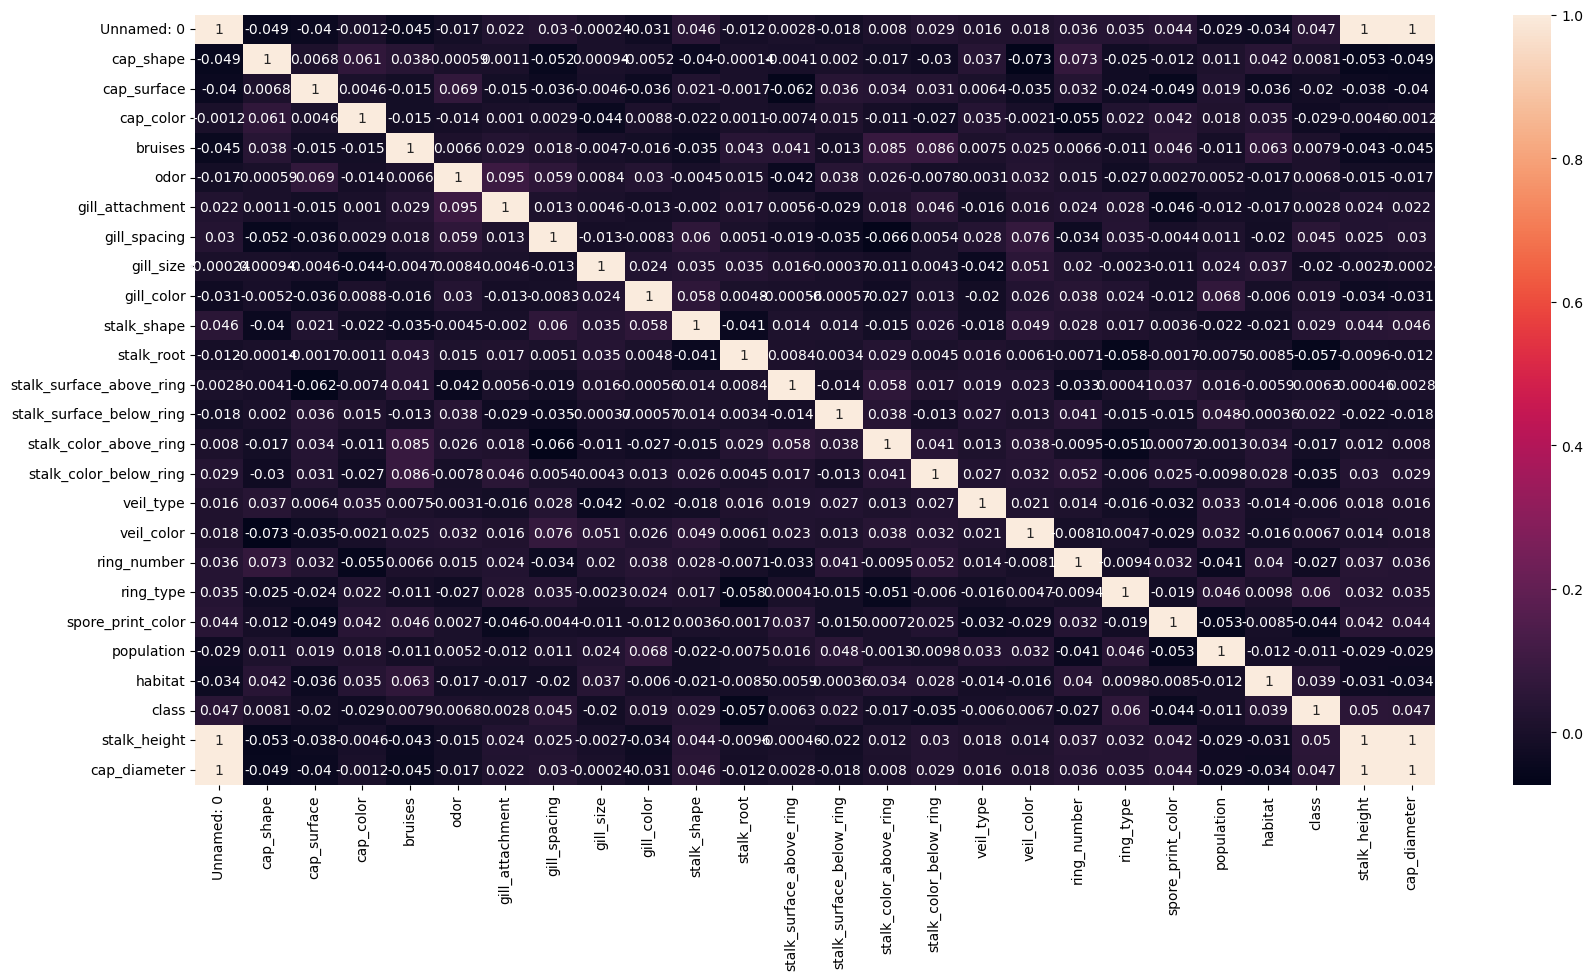

In [25]:
corr_matrix = df.apply(lambda x: pd.factorize(x)[0]).corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Data Preprocessing

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [31]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,667,1,1,0,0,4,3,1,0,3,...,1,0,0,3,1,2,3,0,819,389
1988,707,0,1,4,1,1,1,2,0,1,...,0,0,2,5,8,2,0,1,112,743
1989,227,4,3,5,1,1,1,1,1,2,...,1,1,2,4,5,0,0,0,830,610
1996,885,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,335,521


In [32]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [137]:
df.duplicated().sum()

0

<Axes: >

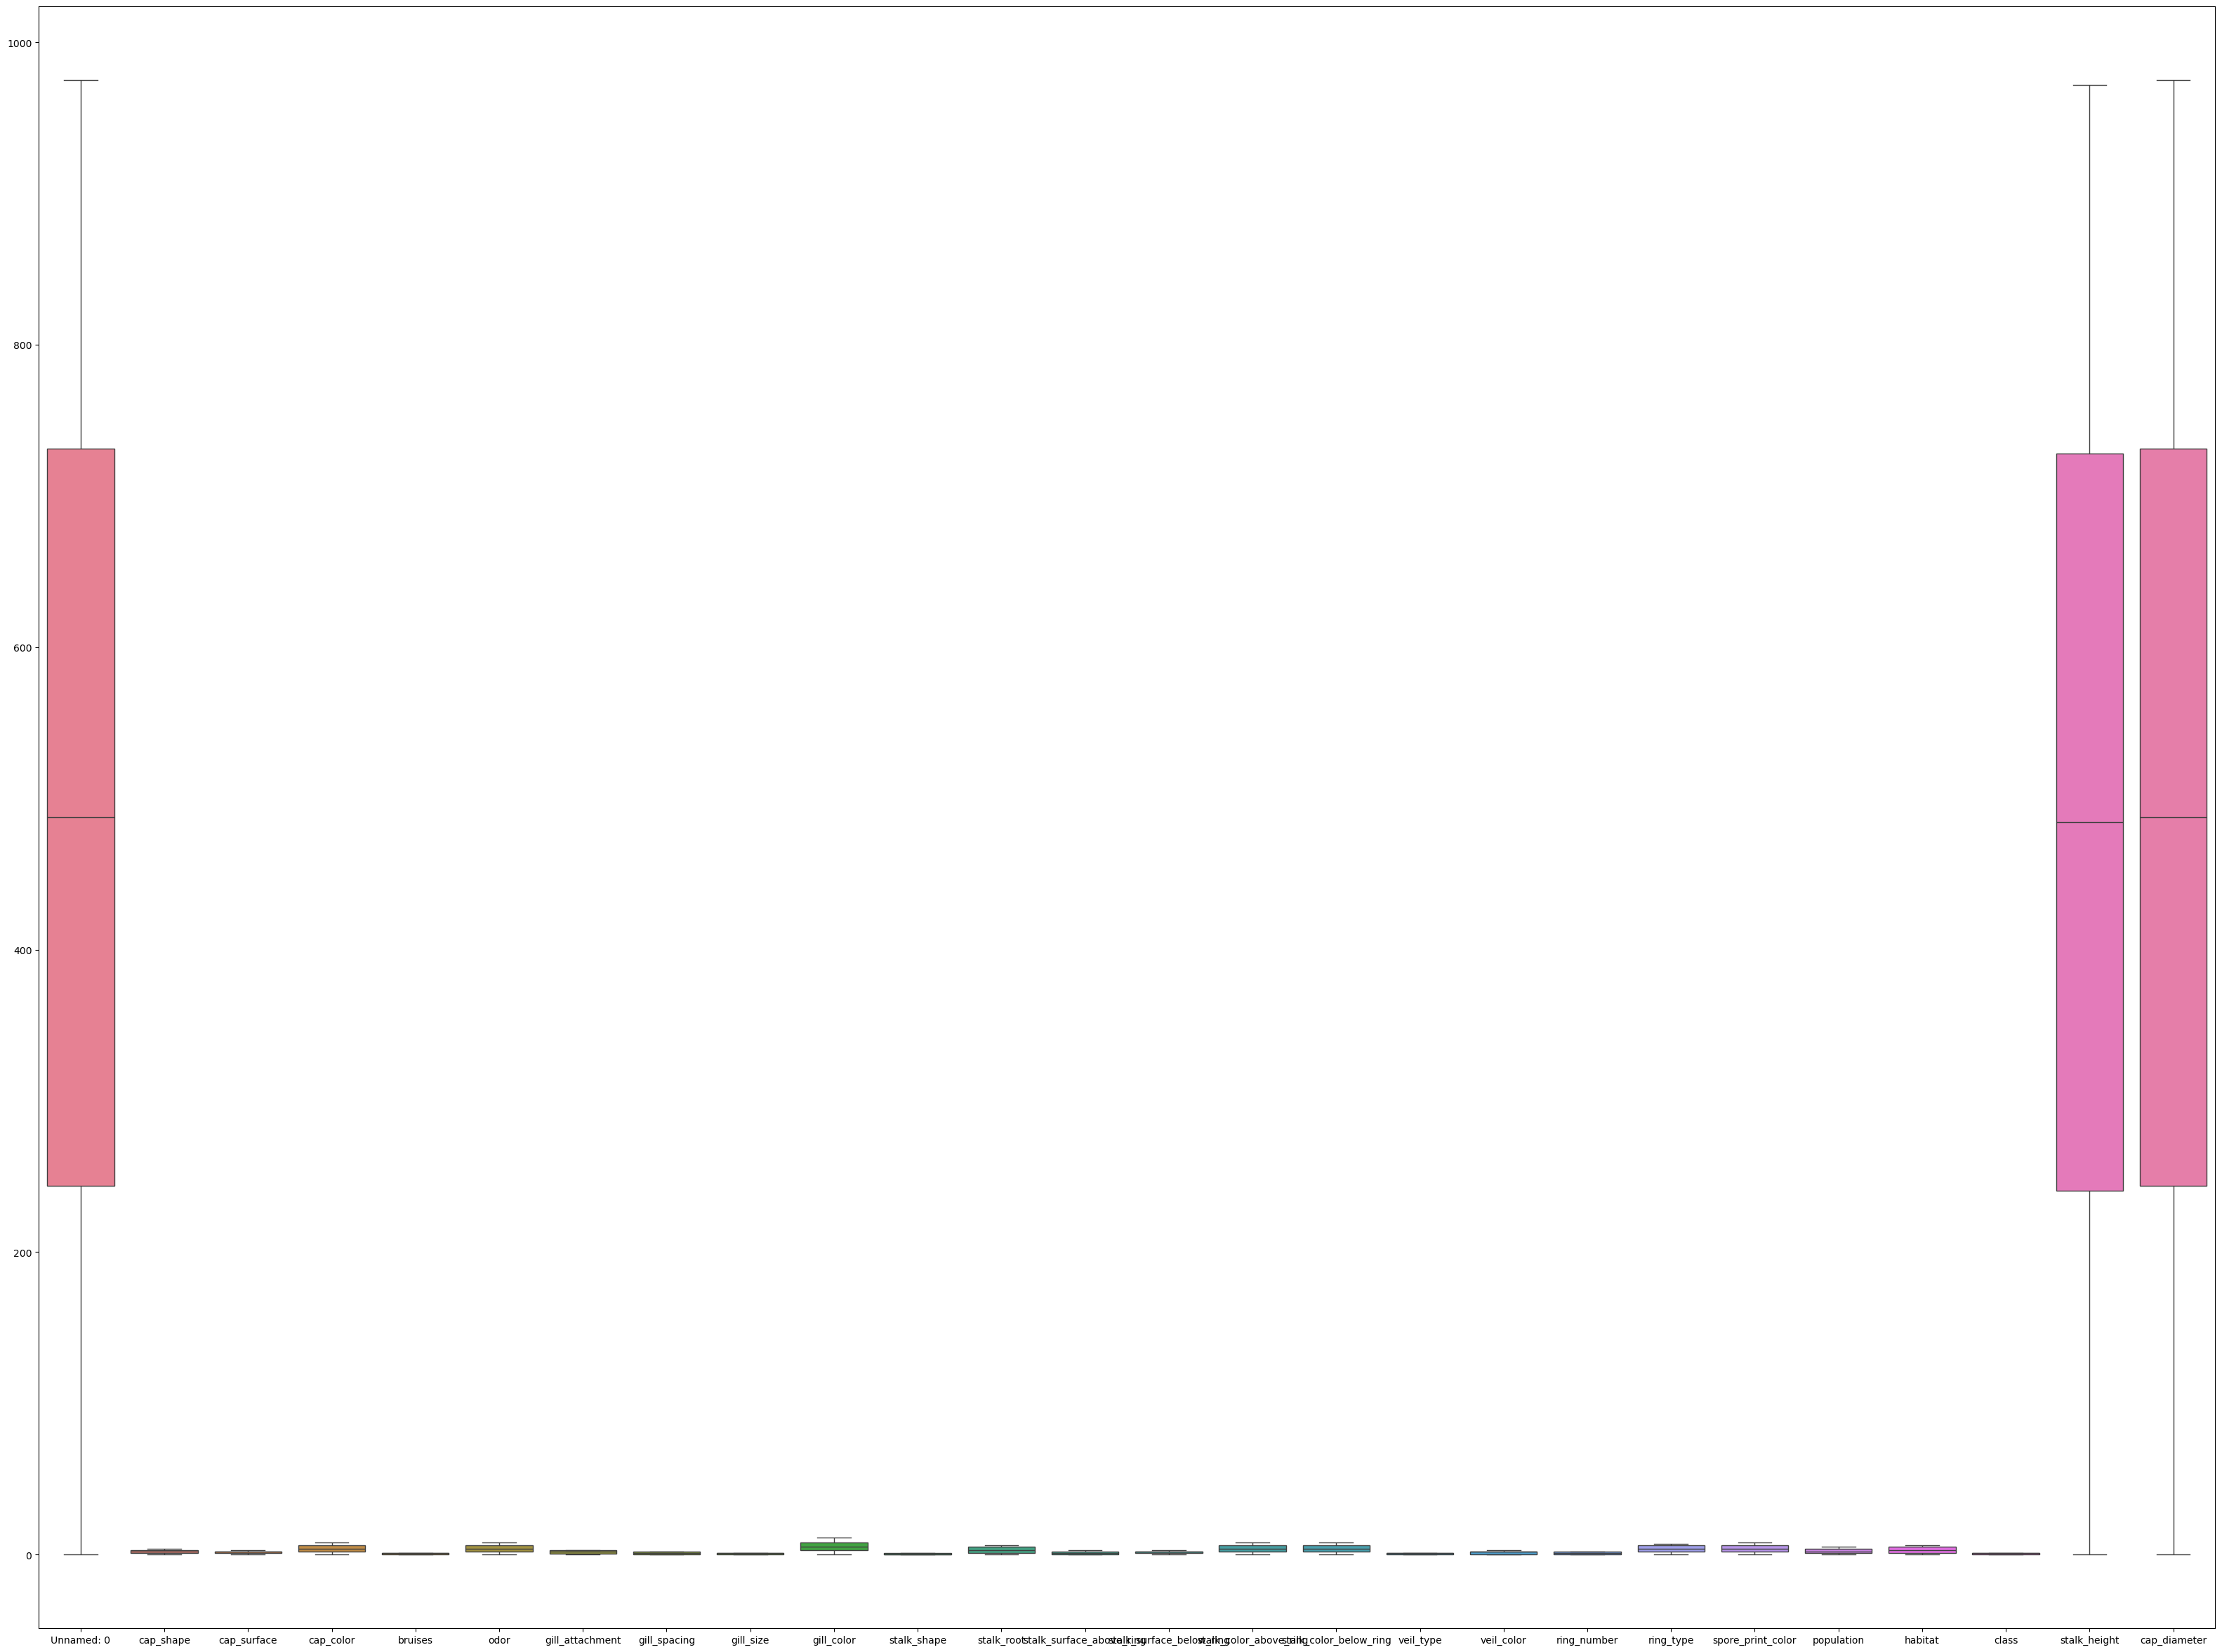

In [33]:
plt.figure(figsize=(40,30))
sns.boxplot(data=df)

In [43]:
features=df.drop(columns='class')
target=df['class']

0       1
1       0
2       1
3       1
4       1
       ..
1985    0
1988    1
1989    0
1996    1
1999    1
Name: class, Length: 976, dtype: int32

In [56]:
std1=StandardScaler()
features=std1.fit_transform(features)
features

array([[ 1.42503845,  1.35139853,  0.41028546, ...,  0.99462141,
         1.53155283, -1.05591268],
       [ 1.05946196,  1.35139853, -1.40576266, ...,  0.99462141,
        -1.26538998,  0.93168765],
       [-0.85715264,  0.65279421, -0.4977386 , ...,  0.99462141,
         0.18632272, -0.73292762],
       ...,
       [-0.92458908,  1.35139853,  1.31830952, ..., -1.57622207,
         1.22630272,  0.43478757],
       [ 1.41084131,  1.35139853,  0.41028546, ...,  0.99462141,
        -0.53066008,  0.11890109],
       [ 1.15884198, -0.04581012,  0.41028546, ...,  0.48045272,
         1.20855562,  1.22272913]])

In [58]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [60]:
x_train

array([[ 0.7648712 ,  1.35139853, -0.4977386 , ...,  0.48045272,
         1.26179692,  1.53506633],
       [-0.29991469,  0.65279421,  0.41028546, ..., -1.06205337,
         1.65578252, -1.16594055],
       [ 0.16149253, -0.74441445,  0.41028546, ...,  0.99462141,
         0.21116866,  0.28216826],
       ...,
       [ 0.90329336, -1.44301877, -1.40576266, ..., -1.57622207,
        -1.55644241, -1.30081343],
       [ 1.6202492 , -0.74441445,  1.31830952, ...,  1.50879011,
        -0.35318909,  0.36380185],
       [-1.05591268, -0.04581012, -0.4977386 , ...,  0.48045272,
        -1.27248882, -0.37444971]])

In [62]:
y_train

976     0
1413    1
112     1
47      1
1970    1
       ..
1497    1
1539    0
1423    1
1299    0
682     1
Name: class, Length: 732, dtype: int32

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(732, 25)
(244, 25)
(732,)
(244,)


## Data Visualization

<Axes: >

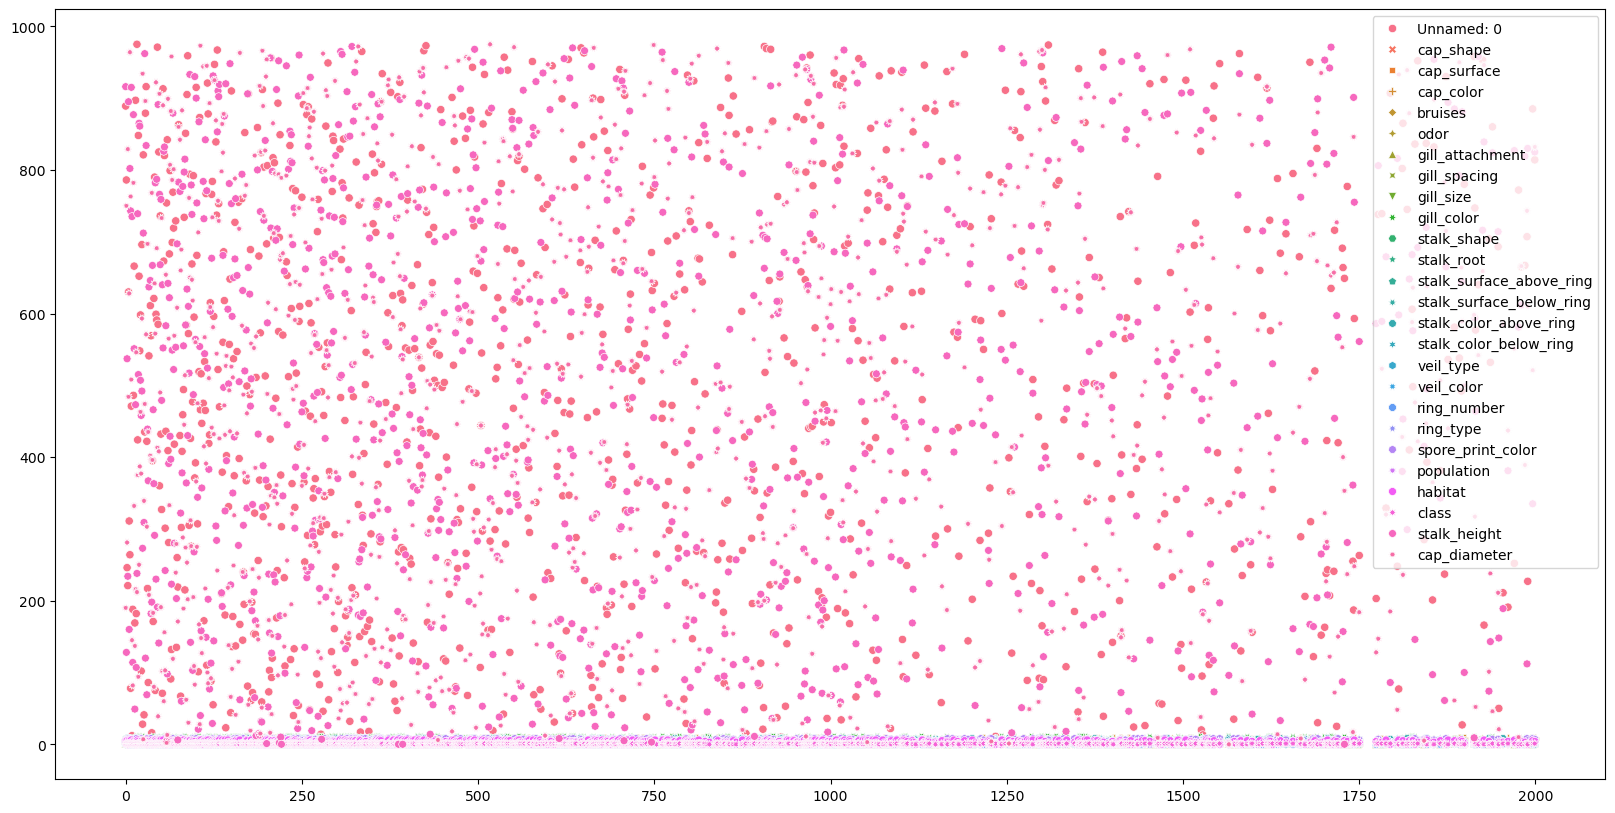

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df)

<Axes: xlabel='class', ylabel='count'>

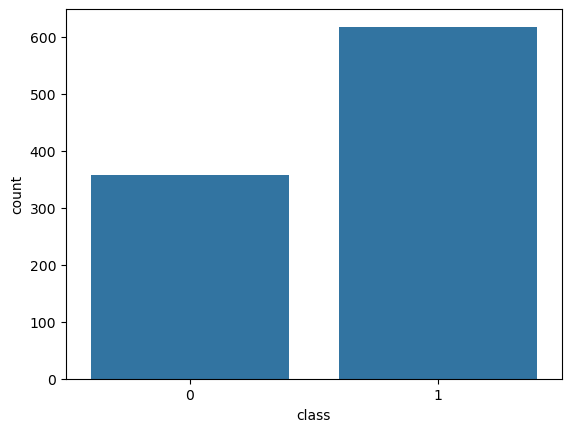

In [69]:
sns.countplot(df,x='class')

## SVM Implementation

In [139]:
svm=SVC(C=1.0,kernel='linear',gamma='scale')

In [141]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [143]:
y_pred=svm.predict(x_test)

In [145]:
accuracy_score(y_test,y_pred)

0.5901639344262295

In [147]:
print(classification_report(y_test,y_pred))
import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.59      1.00      0.74       144

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244



In [149]:
x_train

array([[ 0.7648712 ,  1.35139853, -0.4977386 , ...,  0.48045272,
         1.26179692,  1.53506633],
       [-0.29991469,  0.65279421,  0.41028546, ..., -1.06205337,
         1.65578252, -1.16594055],
       [ 0.16149253, -0.74441445,  0.41028546, ...,  0.99462141,
         0.21116866,  0.28216826],
       ...,
       [ 0.90329336, -1.44301877, -1.40576266, ..., -1.57622207,
        -1.55644241, -1.30081343],
       [ 1.6202492 , -0.74441445,  1.31830952, ...,  1.50879011,
        -0.35318909,  0.36380185],
       [-1.05591268, -0.04581012, -0.4977386 , ...,  0.48045272,
        -1.27248882, -0.37444971]])

#  Visualization of SVM Results

In [152]:
pca=PCA(n_components=10)

In [154]:
pca1=pca.fit(x_train)
pca2=pca.fit(x_test)

In [156]:
x_train_new=pca1.transform(x_train)
x_test_new=pca2.transform(x_test)

In [158]:
svc=SVC(C=1.0,kernel='linear',gamma='scale')

In [160]:
svc.fit(x_train_new,y_train)

SVC(kernel='linear')

In [162]:
y_pred1=svc.predict(x_test_new)

In [164]:
accuracy_score(y_test,y_pred1)

0.5901639344262295

In [130]:
print(x_test_new.shape)

(244, 10)


## Parameter Tuning and Optimization

In [169]:
params={'C':[1,10,20],'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto']}

In [177]:
grid=GridSearchCV(svm,params)

In [179]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [181]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

# Comparison and Analysis

In [189]:
kernels = ['linear', 'poly', 'rbf','sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))

Kernel: linear
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.59      1.00      0.74       144

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244

Kernel: poly
              precision    recall  f1-score   support

           0       0.50      0.07      0.12       100
           1       0.60      0.95      0.73       144

    accuracy                           0.59       244
   macro avg       0.55      0.51      0.43       244
weighted avg       0.56      0.59      0.48       244

Kernel: rbf
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       100
           1       0.59      0.99      0.74       144

    accuracy                           0.59       244
   macro avg       0.55      0.50      0.38       244
weighted avg       0.55      0.59 

In [ ]:
## Strengths: Effective in high-dimensional spaces and works well with clear margin of separation.
## Weaknesses: Performance drops with overlapping classes and is less efficient with large datasets.